In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import koreanize_matplotlib

warnings.filterwarnings('ignore')

In [160]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("sample_submission.csv")

In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79786 entries, 0 to 79785
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sessionID            79786 non-null  object 
 1   userID               79786 non-null  object 
 2   browser              79786 non-null  object 
 3   OS                   79786 non-null  object 
 4   device               79786 non-null  object 
 5   new                  79786 non-null  int64  
 6   quality              79786 non-null  float64
 7   duration             79786 non-null  float64
 8   bounced              79786 non-null  int64  
 9   transaction          79786 non-null  float64
 10  transaction_revenue  79786 non-null  float64
 11  continent            79786 non-null  object 
 12  subcontinent         79786 non-null  object 
 13  country              79786 non-null  object 
 14  traffic_source       79786 non-null  object 
 15  traffic_medium       79786 non-null 

In [163]:
print('continent : ',train['continent'].unique())
print('subcontinent : ',train['subcontinent'].unique())
print('country : ',train['country'].unique())

continent :  ['Americas' 'Europe' 'Asia' 'Africa' 'Oceania' '(not set)']
subcontinent :  ['Northern America' 'Western Europe' 'Southeast Asia' 'Southern Europe'
 'South America' 'Central America' 'Northern Europe' 'Eastern Europe'
 'Eastern Asia' 'Southern Asia' 'Western Asia' 'Northern Africa'
 'Australasia' 'Southern Africa' 'Eastern Africa' 'Western Africa'
 'Caribbean' '(not set)' 'Polynesia' 'Middle Africa' 'Micronesian Region'
 'Central Asia' 'Melanesia']
country :  ['United States' 'Germany' 'Malaysia' 'Greece' 'Brazil' 'Italy' 'Mexico'
 'Laos' 'United Kingdom' 'Philippines' 'Bulgaria' 'Russia' 'Poland'
 'China' 'Romania' 'Belgium' 'India' 'United Arab Emirates' 'Portugal'
 'Canada' 'Algeria' 'Egypt' 'Pakistan' 'Japan' 'Australia' 'South Africa'
 'Turkey' 'Austria' 'New Zealand' 'Singapore' 'Taiwan' 'France'
 'Saudi Arabia' 'Colombia' 'Ecuador' 'Thailand' 'Vietnam' 'Sweden'
 'Sri Lanka' 'South Korea' 'Kuwait' 'Kenya' 'Bolivia' 'Spain' 'Hong Kong'
 'Bangladesh' 'Serbia' 'Netherla

In [164]:
print('continent : ',train['continent'].nunique())
print('subcontinent : ',train['subcontinent'].nunique())
print('country : ',train['country'].nunique())

continent :  6
subcontinent :  23
country :  205


In [165]:
train['subcontinent'].value_counts()

subcontinent
Northern America      111945
Southern Asia          21744
Western Europe         18325
Northern Europe        15432
Southeast Asia         13977
Eastern Asia           13598
Southern Europe        10752
South America           9791
Eastern Europe          9239
Western Asia            7677
Northern Africa         5534
Central America         4201
Australasia             3895
Southern Africa         2164
Western Africa          1971
Eastern Africa           655
Caribbean                569
(not set)                336
Central Asia             258
Middle Africa            190
Micronesian Region        18
Melanesia                 10
Polynesia                  8
Name: count, dtype: int64

In [166]:
#subcontinent변수처리
# 5개 범주만 남기고 나머지는 'etc'로 변경
def categorize_subcontinent(subcontinent):
    return subcontinent if subcontinent in ["Northern America", "Southern Asia", "Western Europe", "Northern Europe", "Southeast Asia"] else "etc"

# apply 함수로 적용
train['subcontinent'] = train['subcontinent'].apply(categorize_subcontinent)
test['subcontinent'] = test['subcontinent'].apply(categorize_subcontinent)


# 결과 출력
print(train['subcontinent'].value_counts())
print(test['subcontinent'].value_counts())

subcontinent
Northern America    111945
etc                  70866
Southern Asia        21744
Western Europe       18325
Northern Europe      15432
Southeast Asia       13977
Name: count, dtype: int64
subcontinent
Northern America    35465
etc                 23353
Southern Asia        6647
Western Europe       5413
Northern Europe      4927
Southeast Asia       3981
Name: count, dtype: int64


In [167]:
train['browser'].unique()

array(['Chrome', 'Samsung Internet', 'Firefox', 'Opera',
       'Safari (in-app)', 'Edge', 'Safari', 'Android Webview',
       'UC Browser', 'Internet Explorer', 'Opera Mini', 'BlackBerry',
       'Android Browser', 'Amazon Silk', 'Coc Coc', 'YaBrowser',
       'Nintendo Browser', 'Nokia Browser', 'MRCHROME', 'Puffin',
       'Mozilla Compatible Agent', 'Maxthon', '+Simple Browser',
       'Apple-iPhone7C2', 'Playstation Vita Browser',
       'osee2unifiedRelease', 'SAMSUNG-SM-B355E Opera', 'DESKTOP', 'Iron',
       'Browser', 'rpfanjzoxyemsgbtichqkudwlv',
       'cajrnbtvqwfkolzyxushpdgime', 'wvsmagudcqeytijorlhxnfzkbp',
       'efkaxnbyohqtspzlvcwrjmigdu', 'bsfnwveckhgpdoyjxmizruqtla',
       'Mozilla', 'Konqueror', 'Netscape', 'Amazon.com', 'SeaMonkey',
       ';__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;',
       'eosutpkiahjzvdgcwxlmyfqbrn', 'cnwmpegudakrqzljtvfxohbysi',
       'fspmihbxzowgnuctrqykjlvade', 'YE',
       ';__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183;

In [168]:
train['browser'].value_counts()

browser
Chrome                                                  174395
Safari                                                   35689
Android Webview                                          13855
Firefox                                                   8436
Internet Explorer                                         4573
                                                         ...  
eosutpkiahjzvdgcwxlmyfqbrn                                   1
;__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;         1
wvsmagudcqeytijorlhxnfzkbp                                   1
efkaxnbyohqtspzlvcwrjmigdu                                   1
NokiaC7-00                                                   1
Name: count, Length: 70, dtype: int64

In [169]:
#browser 변수 처리
def categorize_browser(browser):
    if 'chrome' in browser.lower():
        return 'Chrome'
    elif 'safari' in browser.lower():
        return 'Safari'
    elif 'android' in browser.lower():
        return 'Android Webview'
    elif 'firefox' in browser.lower():
        return 'Firefox'
    elif 'internet explorer' in browser.lower():
        return 'Internet Explorer'
    else:
        return 'etc'
    
    
# apply 함수로 적용
train['browser'] = train['browser'].apply(categorize_browser)
test['browser'] = test['browser'].apply(categorize_browser)

# 결과 출력
print(train['browser'])

0                  Chrome
1                  Chrome
2                     etc
3                  Chrome
4                  Chrome
               ...       
252284             Chrome
252285             Chrome
252286             Chrome
252287    Android Webview
252288             Chrome
Name: browser, Length: 252289, dtype: object


In [170]:
display(train['browser'].value_counts())
display(test['browser'].value_counts())

browser
Chrome               174410
Safari                37684
Android Webview       13965
etc                   13221
Firefox                8436
Internet Explorer      4573
Name: count, dtype: int64

browser
Chrome               57505
Safari               11889
etc                   4151
Firefox               2634
Android Webview       2247
Internet Explorer     1360
Name: count, dtype: int64

In [171]:
#0s변수 처리
train['OS'].value_counts()

OS
Windows             88119
Macintosh           60316
Android             51870
iOS                 29778
Linux                9562
Chrome OS            9222
(not set)            2592
Tizen                 321
Samsung               259
Windows Phone         128
OS/2                   36
Xbox                   31
BlackBerry             29
Playstation Vita        9
Nintendo 3DS            6
Firefox OS              4
FreeBSD                 3
SunOS                   1
Nintendo WiiU           1
SymbianOS               1
Nokia                   1
Name: count, dtype: int64

In [172]:
#OS변수 처리
def categorize_os(os):
    top_os = ["Windows", "Macintosh", "Android", "iOS", "Linux", "Chrome OS"]
    return os if os in top_os else "etc"

# apply 함수로 적용
train['OS'] = train['OS'].apply(lambda x: categorize_os(x))
test['OS'] = test['OS'].apply(lambda x: categorize_os(x))

display(train['OS'].value_counts())
display(test['OS'].value_counts())

OS
Windows      88119
Macintosh    60316
Android      51870
iOS          29778
Linux         9562
Chrome OS     9222
etc           3422
Name: count, dtype: int64

OS
Windows      28383
Macintosh    20338
Android      14338
iOS           9501
Chrome OS     3100
Linux         2947
etc           1179
Name: count, dtype: int64

In [173]:
#traffic_source변수 처리
train['traffic_source'].value_counts()

traffic_source
google                  116007
(direct)                 59026
youtube.com              52871
analytics.google.com      7609
Partners                  5369
                         ...  
google.ie                    1
qc.search.yahoo.com          1
earth.google.com             1
br.search.yahoo.com          1
calendar.google.com          1
Name: count, Length: 168, dtype: int64

In [174]:
train['traffic_source'].unique()

array(['google', '(direct)', 'Partners', 'groups.google.com',
       'youtube.com', 'google.com', 'bing', 'google.co.jp',
       'analytics.google.com', 'baidu', 'quora.com',
       'googleads.g.doubleclick.net', 'pinterest.com', 'mail.google.com',
       'dealspotr.com', 'qiita.com', 'l.facebook.com', 'reddit.com',
       'sites.google.com', 'blog.golang.org', 'support.google.com',
       'yahoo', 'dfa', 't.co', 'lunametrics.com', 'docs.google.com',
       'adwords.google.com', 's0.2mdn.net', 'm.baidu.com',
       'm.facebook.com', 'int.search.tb.ask.com', 'google.com.br',
       'google.es', 'arstechnica.com', 'msn.com', 'tw.search.yahoo.com',
       'facebook.com', 'google.de', 'hangouts.google.com',
       'duckduckgo.com', 'r.search.aol.com', 'my.yahoo.com',
       'google.co.za', 'au.search.yahoo.com', 'in.search.yahoo.com',
       'outlook.live.com', 'productforums.google.com', 'ask',
       'google.co.id', 'google.co.uk', 'myactivity.google.com',
       'google.com.ua', 'google

In [175]:
def categorize_traffic_source(traffic_source):
    lower_case_traffic_source = traffic_source.lower()  # 대소문자 구분 없이 처리하기 위해 소문자로 변환
    if 'google' in lower_case_traffic_source:
        return 'google'
    elif '(direct)' in lower_case_traffic_source:
        return '(direct)'
    elif 'youtube' in lower_case_traffic_source:
        return 'youtube.com'
    elif 'partners' in lower_case_traffic_source:
        return 'Partners'
    else:
        return 'etc'

# apply 함수로 적용
train['traffic_source'] = train['traffic_source'].apply(categorize_traffic_source)
test['traffic_source'] = test['traffic_source'].apply(categorize_traffic_source)

display(train['traffic_source'].value_counts())
display(test['traffic_source'].value_counts())

traffic_source
google         129283
(direct)        59026
youtube.com     52876
etc              5735
Partners         5369
Name: count, dtype: int64

traffic_source
google         41959
(direct)       19369
youtube.com    13504
Partners        2804
etc             2150
Name: count, dtype: int64

In [176]:
train['traffic_medium'].value_counts()

traffic_medium
organic      107370
referral      70047
(none)        59022
cpc            9978
affiliate      5365
cpm             501
(not set)         6
Name: count, dtype: int64

In [177]:
#traffic_medium 변수 처리
def categorize_traffic_medium(traffic_medium):
    top_mediums = ["organic", "referral", "(none)"]
    return traffic_medium if traffic_medium in top_mediums else "etc"

# apply 함수로 적용
train['traffic_medium'] = train['traffic_medium'].apply(lambda x: categorize_traffic_medium(x))
test['traffic_medium'] = test['traffic_medium'].apply(lambda x: categorize_traffic_medium(x))

display(train['traffic_medium'].value_counts())
display(test['traffic_medium'].value_counts())


traffic_medium
organic     107370
referral     70047
(none)       59022
etc          15850
Name: count, dtype: int64

traffic_medium
organic     35894
referral    19814
(none)      19367
etc          4711
Name: count, dtype: int64

In [178]:
#범주형 변수 원핫인코딩
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()
# 각 변수에 대해 원핫인코딩 수행
encoded_data = encoder.fit_transform(train[['browser', 'OS', 'device', 'continent', 'subcontinent', 'traffic_source', 'traffic_medium']])
# 결과를 데이터프레임으로 변환
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['browser', 'OS', 'device', 'continent', 'subcontinent', 'traffic_source', 'traffic_medium']))
# 테스트 데이터에 대해 transform 수행
encoded_test = encoder.transform(test[['browser', 'OS', 'device', 'continent', 'subcontinent', 'traffic_source', 'traffic_medium']])
encoded_test_df = pd.DataFrame(encoded_test.toarray(), columns=encoder.get_feature_names_out(['browser', 'OS', 'device', 'continent', 'subcontinent', 'traffic_source', 'traffic_medium']))

train.drop(columns=['browser', 'OS', 'device', 'continent', 'subcontinent', 'traffic_source', 'traffic_medium'], inplace=True)
train_encoded = pd.concat([train, encoded_df], axis=1)
test.drop(columns=['browser', 'OS', 'device', 'continent', 'subcontinent', 'traffic_source', 'traffic_medium'], inplace=True)
test_encoded = pd.concat([test, encoded_test_df], axis=1)


In [208]:
#수치형 변수 로그 변환
variables_to_log_scale = ['quality', 'duration', 'transaction', 'transaction_revenue']
def log_scale(df):
    for variable in variables_to_log_scale:
        df[variable] = df[variable].replace(0, 0.0001)
        df[variable] = np.log1p(df[variable])
        
log_scale(train_encoded)
log_scale(test_encoded)
    

In [179]:
#수치형 변수 이상치 처리
def replace_outliers_with_IQR(df, columns):
    """
    이상치를 IQR을 사용하여 대체하는 함수
    
    :param df: 데이터프레임
    :param columns: 이상치를 대체할 열 이름 목록
    :return: 이상치를 IQR을 사용하여 대체한 데이터프레임
    """
    replaced_df = df.copy()  # 원본 데이터프레임을 변경하지 않기 위해 복사본 생성
    
    for column in columns:
        # 사분위수 계산
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1

        # 이상치 경계값 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치 대체
        replaced_df.loc[replaced_df[column] < lower_bound, column] = lower_bound
        replaced_df.loc[replaced_df[column] > upper_bound, column] = upper_bound
    
    return replaced_df

# 대체할 열 이름 목록
columns = ['quality', 'duration', 'transaction', 'transaction_revenue']

# 함수 적용
replaced_train_df = replace_outliers_with_IQR(train_encoded, columns)
replaced_test_df = replace_outliers_with_IQR(test_encoded, columns)

In [180]:
#수치형 변수 표준화 처리
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['quality', 'duration', 'transaction', 'transaction_revenue']

replaced_train_df[numerical_columns] = scaler.fit_transform(replaced_train_df[numerical_columns])

# 테스트 데이터
replaced_test_df[numerical_columns] = scaler.transform(replaced_test_df[numerical_columns])



In [209]:
replaced_train_df['new_qual']=replaced_train_df['new']*replaced_train_df['quality']
replaced_train_df['new_du']=replaced_train_df['new']*replaced_train_df['duration']

replaced_test_df['new_qual']=replaced_test_df['new']*replaced_test_df['quality']
replaced_test_df['new_du']=replaced_test_df['new']*replaced_test_df['duration']


In [181]:
replaced_train_df.head()

,sessionID,userID,TARGET,new,quality,duration,bounced,transaction,transaction_revenue,country,...,subcontinent_etc,traffic_source_(direct),traffic_source_Partners,traffic_source_etc,traffic_source_google,traffic_source_youtube.com,traffic_medium_(none),traffic_medium_etc,traffic_medium_organic,traffic_medium_referral
0,SESSION_000000,USER_000000,17.0,0,0.0,2.038631,0,0.0,0.0,United States,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,SESSION_000001,USER_000001,3.0,1,0.0,-0.097329,0,0.0,0.0,Germany,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,SESSION_000002,USER_000002,1.0,1,0.0,-0.698790,1,0.0,0.0,Malaysia,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,SESSION_000003,USER_000003,1.0,1,0.0,-0.698790,1,0.0,0.0,United States,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,SESSION_000004,USER_000004,1.0,0,0.0,-0.698790,1,0.0,0.0,United States,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [182]:
# 삭제할 열 이름 목록
columns_to_drop = ['sessionID', 'userID', 'country', 'keyword', 'referral_path','TARGET']

# 데이터프레임에서 주어진 열들을 삭제
train_target=replaced_train_df['TARGET']
replaced_train_df.drop(columns=columns_to_drop, inplace=True)

columns_to_drop = ['sessionID', 'userID', 'country', 'keyword', 'referral_path']
replaced_test_df.drop(columns=columns_to_drop, inplace=True)

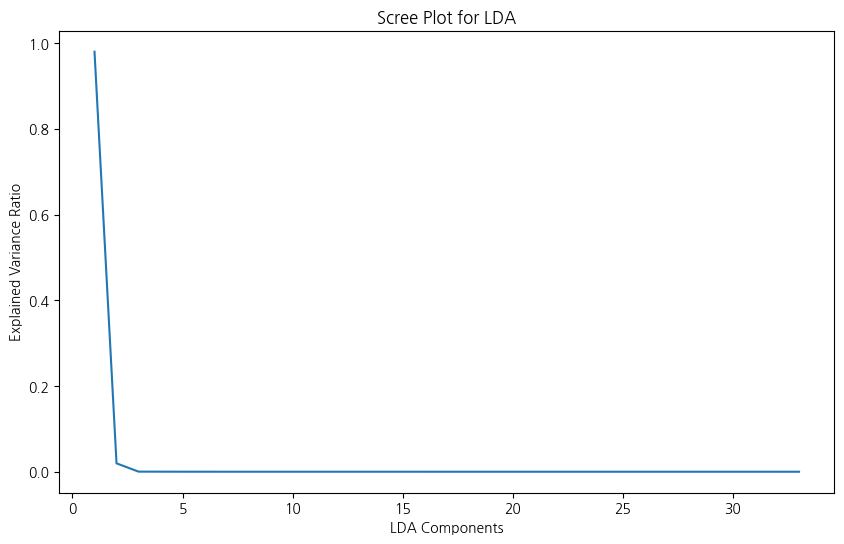

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# LDA 객체 생성
lda = LDA()

# LDA를 훈련 데이터에 적용
lda.fit(replaced_train_df, train_target)
lda_transformed_train = lda.transform(replaced_train_df)

plt.figure(figsize=(10, 6))
plt.plot(range(1, lda_transformed_train.shape[1] + 2), lda.explained_variance_ratio_)
plt.xlabel('LDA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for LDA')
plt.show()

In [201]:
# LDA수는 가장 적합한 2로 설정해서 다시 적용
lda = LDA(n_components=2)

lda.fit(replaced_train_df, train_target)
lda_transformed_train = lda.transform(replaced_train_df)

lda_transformed_test = lda.transform(replaced_test_df)

In [202]:
lda_transformed_train.shape[1]

2

In [203]:
# LDA로 생성된 칼럼명을 작성하기 위함
lda_columns_train = [f'LDA{i+1}' for i in range(lda_transformed_train.shape[1])]
lda_columns_test = [f'LDA{i+1}' for i in range(lda_transformed_test.shape[1])]

lda_df_train = pd.DataFrame(lda_transformed_train, columns = lda_columns_train)
lda_df_test = pd.DataFrame(lda_transformed_test, columns = lda_columns_test)

In [204]:
lda_train_x = pd.concat([replaced_train_df, lda_df_train], axis=1)
lda_test_x = pd.concat([replaced_test_df, lda_df_test], axis=1)

In [205]:
lda_train_x.columns

Index(['new', 'quality', 'duration', 'bounced', 'transaction',
       'transaction_revenue', 'browser_Android Webview', 'browser_Chrome',
       'browser_Firefox', 'browser_Internet Explorer', 'browser_Safari',
       'browser_etc', 'OS_Android', 'OS_Chrome OS', 'OS_Linux', 'OS_Macintosh',
       'OS_Windows', 'OS_etc', 'OS_iOS', 'device_desktop', 'device_mobile',
       'device_tablet', 'continent_(not set)', 'continent_Africa',
       'continent_Americas', 'continent_Asia', 'continent_Europe',
       'continent_Oceania', 'subcontinent_Northern America',
       'subcontinent_Northern Europe', 'subcontinent_Southeast Asia',
       'subcontinent_Southern Asia', 'subcontinent_Western Europe',
       'subcontinent_etc', 'traffic_source_(direct)',
       'traffic_source_Partners', 'traffic_source_etc',
       'traffic_source_google', 'traffic_source_youtube.com',
       'traffic_medium_(none)', 'traffic_medium_etc', 'traffic_medium_organic',
       'traffic_medium_referral', 'LDA1', 'LDA2'

In [207]:
lda_train_x.head()

,new,quality,duration,bounced,transaction,transaction_revenue,browser_Android Webview,browser_Chrome,browser_Firefox,browser_Internet Explorer,...,traffic_source_Partners,traffic_source_etc,traffic_source_google,traffic_source_youtube.com,traffic_medium_(none),traffic_medium_etc,traffic_medium_organic,traffic_medium_referral,LDA1,LDA2
0,0,0.0,2.038631,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.091803,2.856329
1,1,0.0,-0.097329,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.518823,-1.603713
2,1,0.0,-0.698790,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-6.840201,-0.209969
3,1,0.0,-0.698790,1,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.719953,0.235915
4,0,0.0,-0.698790,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-6.779186,0.055448
